### Load packages and set variables

In [2]:
# import packages
import os # files and folders directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pykakasi # transfer hiragana and katakana to English
import re

In [4]:
# variables
years = [1986, 1990, 1993, 1996, 2000, 2003, 2005, 2009, 2012]
access_right = 0o755

### Verify original txt files

In [5]:
# Test cases
katakana_chart = "ァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾタダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポマミムメモャヤュユョヨラリルレロヮワヰヱヲンヴヵヶヽヾ"
file = "Aichi_1986愛知県第１区ｲﾏｴﾀﾞﾉﾘｵ今枝敬雄.txt"
def char_is_katakana(c) -> bool:
    return u'\30A0' <= c <= u'\30FF'

new_file = ""
kks = pykakasi.kakasi()
result = kks.convert(file)
for word in file:
    if char_is_katakana(word):
        continue
    else:
        new_file += word
new_file = re.sub(r'\d{4}', '', new_file)
print(new_file)


Aichi_愛知県第１区ｲﾏｴﾀﾞﾉﾘｵ今枝敬雄.txt


In [6]:
# File counts
ku_list = {}
for year in years:
    manifesto_folder_path = f'/Users/deankuo/Desktop/python/dissertation_replicate/{year}'
    ku = 0
    for root, dirs, files in os.walk(manifesto_folder_path):
        for file in sorted(files):
            ku += 1 if file[0] != '.' else 0
    ku_list.update({f'{year}': ku})
            
print(ku_list)

{'1986': 47, '1990': 42, '1993': 42, '1996': 45, '2000': 47, '2003': 47, '2005': 47, '2009': 47, '2012': 47}


### Create output folders and output file names

In [12]:
for year in years:
    output_folder = f'/Users/deankuo/Desktop/python/dissertation_replicate/txt_version/{year}'
    # 建立年份資料夾
    try:
        os.mkdir(output_folder, access_right)
    except OSError:
        print (f"Creation of the directory {output_folder} failed")
    else:
        print (f"Successfully created the directory {output_folder}")

Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/1986
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/1990
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/1993
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/1996
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/2000
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/2003
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/2005
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/2009
Successfully created the directory /Users/deankuo/Desktop/python/dissertation_replicate/txt_version/2012


In [7]:
# Sift halfwidth　カタカナ from file name
def is_halfwidth_katakana(char):
    unicode_value = ord(char)
    return 0xff65 <= unicode_value <= 0xff9f
    
    
# Garbage word
def is_garbage_word(char):
    garbage_word = ['＃', 'X', '.', '♯']
    return True if char in garbage_word else False

# Get ku name from the original file name
def get_ku_name(file):
    ku = ""
    for word in file:
        if word.isnumeric():
            break
        else:
            ku += word
    return ku

# Output file name
def generate_filename(line, year, ku):
    temp_filename = ""
    for word in line:
        if is_halfwidth_katakana(word) or is_garbage_word(word):
            continue
        elif word in ['区', '県']:
            temp_filename += f'{word}_'
        else:
            temp_filename += word

    temp_filename = temp_filename.strip()
    temp_filename = re.sub(r'\d{4}', '', temp_filename)
    return f'{year}_{ku}_{temp_filename}.txt'

In [8]:
# 清理原始檔案，將每一年度每一份選舉公報單獨做成一份txt檔
for year in years:
    manifesto_folder_path = f'/Users/deankuo/Desktop/python/dissertation_replicate/{year}'
    output_folder = f'/Users/deankuo/Desktop/python/dissertation_replicate/txt_version/{year}'

    for root, dirs, files in os.walk(manifesto_folder_path):
        for file in sorted(files):
            if file == ".DS_Store":
                continue

            ku = get_ku_name(file)
            ku = "Aichi" if ku == "aiti" else ku[0].upper() + ku[1:]

            with open(f'{manifesto_folder_path}/{file}', 'r') as f:
                filename = None
                content = []

                for line in f:
                    starting_patterns = ['＃', 'X.', '♯', ' ＃', ' X.', '#', ' ♯', ' #']
                    if any(line.startswith(pattern) for pattern in starting_patterns):
                        if filename is not None:
                            with open(os.path.join(output_folder, filename), 'w') as output_file:
                                output_file.writelines(content)

                        filename = generate_filename(line, year, ku)
                        content = []
                    else:
                        content.append(line)


                with open(os.path.join(output_folder, filename), 'w') as output_file:
                    output_file.writelines(content)


In [9]:
# Number of manifestos in each election
sum = 0

for year in years:
    dir_path = f"/Users/deankuo/Desktop/python/dissertation_replicate/txt_version/{year}"
    globals()[f"count_{year}"] = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            globals()[f"count_{year}"] += 1
    sum +=  globals()[f"count_{year}"]
    print(f'{year} manifesto files number:' + str(globals()[f"count_{year}"]))
print(f"The total manifesto number (from 1986 to 2009): {sum - count_2012}") # 一開始只有7470，更新條件後變為7480


1986 manifesto files number:808
1990 manifesto files number:802
1993 manifesto files number:821
1996 manifesto files number:1131
2000 manifesto files number:1099
2003 manifesto files number:1005
2005 manifesto files number:987
2009 manifesto files number:827
2012 manifesto files number:1242
The total manifesto number (from 1986 to 2009): 7480


### Visualize the output data

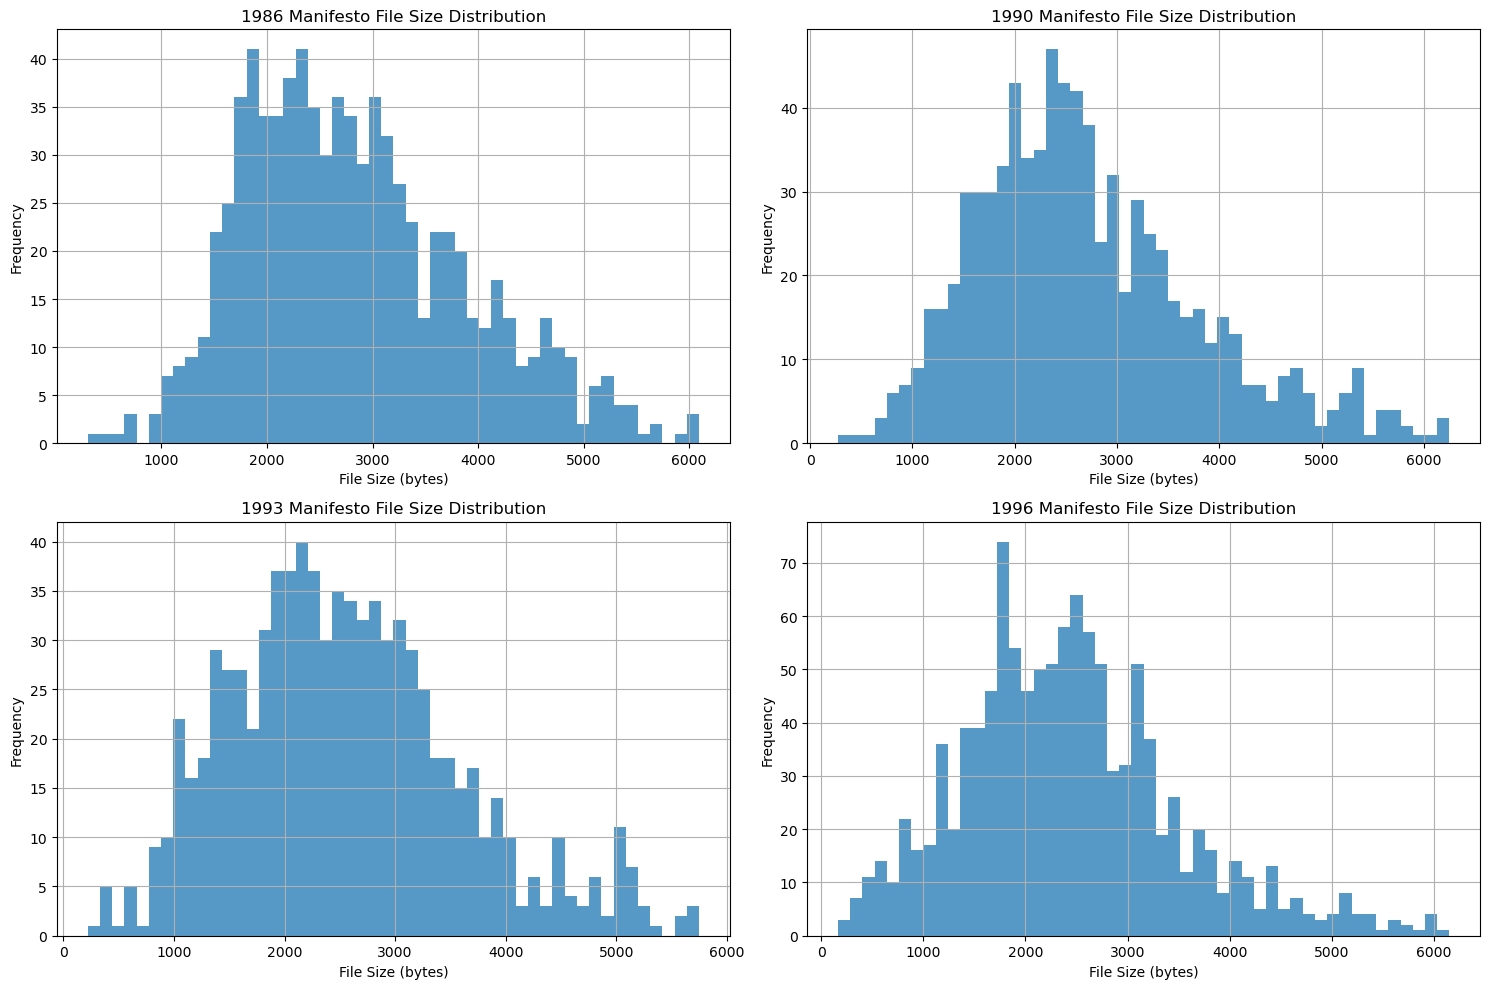

IndexError: index 2 is out of bounds for axis 0 with size 2

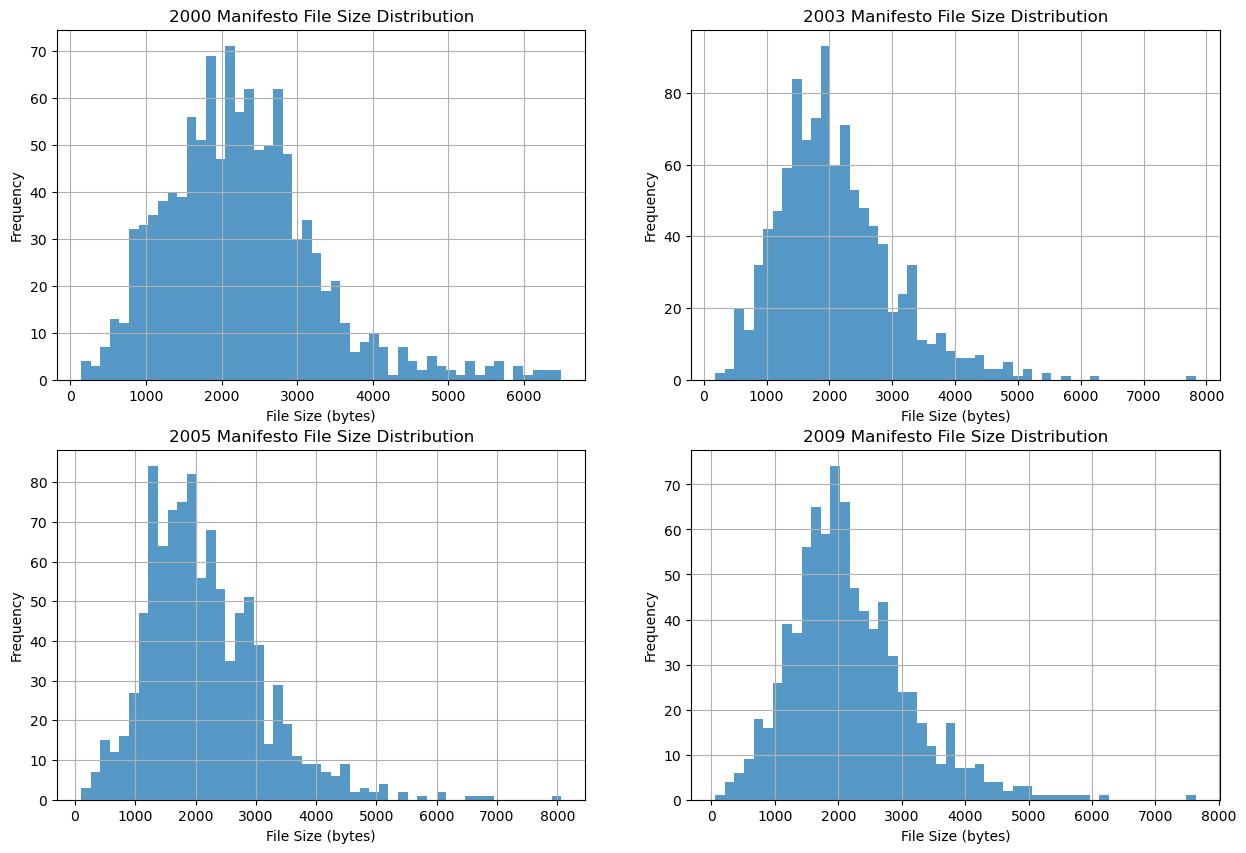

In [10]:
def get_file_sizes(folder_path):
    file_sizes = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == ".DS_Store":
                continue
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)
            file_sizes.append(file_size)
    return file_sizes

def visualize_file_sizes(years, folder_prefix, rows=2, cols=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for idx, year in enumerate(years):
        folder_path = f"{folder_prefix}/{year}"
        file_sizes = get_file_sizes(folder_path)
        ax = axes[idx // cols, idx % cols] # type: ignore
        ax.hist(file_sizes, bins=50, alpha=0.75)
        ax.set_xlabel('File Size (bytes)')
        ax.set_ylabel('Frequency')
        ax.set_title(f"{year} Manifesto File Size Distribution")
        ax.grid(True)
    plt.tight_layout()
    plt.show()

folder_prefix = "/Users/deankuo/Desktop/python/dissertation_replicate/txt_version"

# Split years list into two sublists
years_part1 = years[:4]
years_part2 = years[4:]

# Visualize the file size distribution for each sublist
visualize_file_sizes(years_part1, folder_prefix)
visualize_file_sizes(years_part2, folder_prefix)


File with special characters and year 2000: 2000_Saitama_埼玉県_第１３区_武山ゆり子.txt

File with special characters and year 2003: 2003_Kanagawa_神奈川県_第１８区_やまぎわ大志郎.txt

File with special characters and year 2005: 2005_Nagasaki_長崎県_第３区_谷川やいち.txt

File with special characters and year 2005: 2005_Ehime_愛媛県_第１区_玉井あきら.txt

File with special characters and year 2005: 2005_Tokyo_東京都第２１区_長島昭久.txt

File with special characters and year 2005: 2005_Fukui_福井県_第１区_ささき竜三.txt

File with special characters and year 2005: 2005_Fukui_福井県_第１区_かねもと幸枝.txt

File with special characters and year 2005: 2005_Tokyo_東京都第６区_おちたかお.txt

File with special characters and year 2005: 2005_Tokyo_東京都第１０区_さめじま宗明.txt

File with special characters and year 2005: 2005_Aomori_青森県_第２区_中村友信.txt

File with special characters and year 2005: 2005_Saitama_埼玉県_第４区_桜井はる子.txt

File with special characters and year 2005: 2005_Saitama_埼玉県_第２区_石田勝之.txt

File with special characters and year 2005: 2005_Mie_三重県_第２区_中川正春.txt



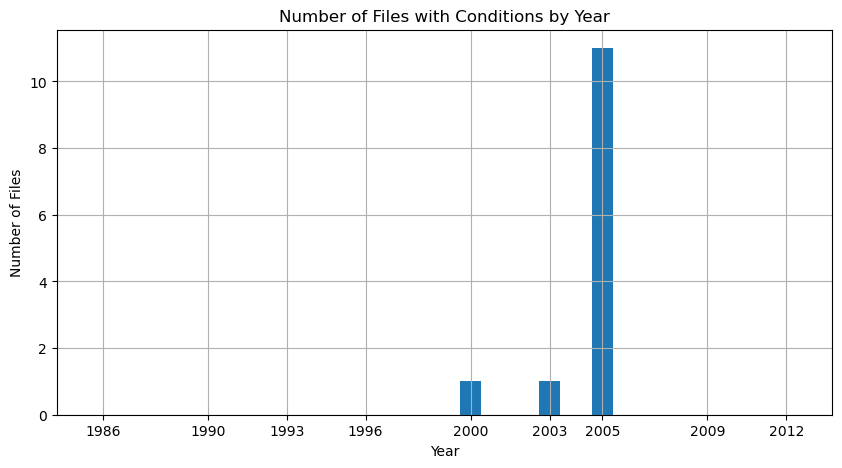

In [11]:
# Check if manifestos contain other manifestos and halfwidth katakana characters
def check_special_conditions_in_files(folder_path, year, check_function):
    files_with_conditions = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == ".DS_Store":
                continue

            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
                if str(year) in content:
                    for char in content:
                        if check_function(char):
                            files_with_conditions.append((file, file_path))
                            break

    return files_with_conditions


def visualize_file_counts(year_file_counts):
    years, counts = zip(*year_file_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(years, counts)
    plt.xlabel('Year')
    plt.ylabel('Number of Files')
    plt.title('Number of Files with Conditions by Year')
    plt.xticks(years)  # Set the x-axis ticks to the years in the year_file_counts list
    plt.grid(True)
    plt.show()



year_file_counts = []
for year in years:
    dir_path = f"/Users/deankuo/Desktop/python/dissertation_replicate/txt_version/{year}"
    result = check_special_conditions_in_files(dir_path, year, is_halfwidth_katakana)
    
    year_file_counts.append((year, len(result)))
    for file, file_path in result:
        print(f"File with special characters and year {year}: {file}\n")

visualize_file_counts(year_file_counts)


## 尚未排除掉不具參考性的候選人（沒有主要政黨背書 | 得票少於10000） 

1986 files: 808 > 800  
1990 files: 801 < 854  
1993 files: 821 < 866  
1996 files: 1130 > 1126  
2000 files: 1099 < 1070  
2003 files: 1005 > 994  
2005 files: 987 > 966  
2009 files: 819 < 821  
2012 files: 1242 ? (沒有資料)  
後面的檔案數是從Catalinac, Amy, 2017, "Replication Data for: Positioning under Alternative Electoral Systems", https://doi.org/10.7910/DVN/PENDX4, Harvard Dataverse 中的TDM_new.csv檔案計算出來，總共有7497個選舉公報（和書上的一樣)  